<a href="https://colab.research.google.com/github/RMDircio/DS-Unit-4-Sprint-3-Deep-Learning/blob/main/module1-rnn-and-lstm/Alex_Kim_Lecture_DSPT5_DS_441_RNN_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 4, Sprint 3, Module 1*

---


# Recurrent Neural Networks (RNNs) and Long Short Term Memory (LSTM) (Prepare)

<img src="https://media.giphy.com/media/l2JJu8U8SoHhQEnoQ/giphy.gif" width=480 height=356>
<br></br>
<br></br>

## Learning Objectives
- <a href="#p1">Part 1: </a>Describe Neural Networks used for modeling sequences
- <a href="#p2">Part 2: </a>Apply a LSTM to a text generation problem using Keras

## Overview

> "Yesterday's just a memory - tomorrow is never what it's supposed to be." -- Bob Dylan

Wish you could save [Time In A Bottle](https://www.youtube.com/watch?v=AnWWj6xOleY)? With statistics you can do the next best thing - understand how data varies over time (or any sequential order), and use the order/time dimension predictively.

A sequence is just any enumerated collection - order counts, and repetition is allowed. Python lists are a good elemental example - `[1, 2, 2, -1]` is a valid list, and is different from `[1, 2, -1, 2]`. The data structures we tend to use (e.g. NumPy arrays) are often built on this fundamental structure.

A time series is data where you have not just the order but some actual continuous marker for where they lie "in time" - this could be a date, a timestamp, [Unix time](https://en.wikipedia.org/wiki/Unix_time), or something else. All time series are also sequences, and for some techniques you may just consider their order and not "how far apart" the entries are (if you have particularly consistent data collected at regular intervals it may not matter).

# Neural Networks for Sequences (Learn)

## Overview

There's plenty more to "traditional" time series, but the latest and greatest technique for sequence data is recurrent neural networks. A recurrence relation in math is an equation that uses recursion to define a sequence - a famous example is the Fibonacci numbers:

$F_n = F_{n-1} + F_{n-2}$

For formal math you also need a base case $F_0=1, F_1=1$, and then the rest builds from there. But for neural networks what we're really talking about are loops:

![Recurrent neural network](https://upload.wikimedia.org/wikipedia/commons/b/b5/Recurrent_neural_network_unfold.svg)

The hidden layers have edges (output) going back to their own input - this loop means that for any time `t` the training is at least partly based on the output from time `t-1`. The entire network is being represented on the left, and you can unfold the network explicitly to see how it behaves at any given `t`.

Different units can have this "loop", but a particularly successful one is the long short-term memory unit (LSTM):

![Long short-term memory unit](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Long_Short-Term_Memory.svg/1024px-Long_Short-Term_Memory.svg.png)

There's a lot going on here - in a nutshell, the calculus still works out and backpropagation can still be implemented. The advantage (ane namesake) of LSTM is that it can generally put more weight on recent (short-term) events while not completely losing older (long-term) information.

After enough iterations, a typical neural network will start calculating prior gradients that are so small they effectively become zero - this is the [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem), and is what RNN with LSTM addresses. Pay special attention to the $c_t$ parameters and how they pass through the unit to get an intuition for how this problem is solved.

So why are these cool? One particularly compelling application is actually not time series but language modeling - language is inherently ordered data (letters/words go one after another, and the order *matters*). [The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) is a famous and worth reading blog post on this topic.

Another good article: [Understading LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

For our purposes, let's use TensorFlow and Keras to train RNNs with natural language. Resources:

- https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py
- https://keras.io/layers/recurrent/#lstm
- http://adventuresinmachinelearning.com/keras-lstm-tutorial/

Note that `tensorflow.contrib` [also has an implementation of RNN/LSTM](https://www.tensorflow.org/tutorials/sequences/recurrent).

## Follow Along

Sequences come in many shapes and forms from stock prices to text. We'll focus on text, because modeling text as a sequence is a strength of Neural Networks. Let's start with a simple classification task using a TensorFlow tutorial. 

### RNN/LSTM Sentiment Classification with Keras

In [1]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80 # only keeping the last 80 words from review
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


In [2]:
x_train[0] # data is preprocessed as tokens

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,

In [3]:
# function to get the words from the index of tokens

def print_text_from_seq(x):
    INDEX_FROM=3   # word index offset
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}

    word_to_id["<PAD>"] = 0 # padding token  
    '''
    pad with zeros at the begining if needed 
    if maxlen > than actual number of words in review 
    theory is more usefull words are at the end of a review
    '''

    word_to_id["<START>"] = 1 # start token
    word_to_id["<UNK>"] = 2 # unknown token
    word_to_id["<UNUSED>"] = 3 # unused token
    # can have a <END> token 

    id_to_word = {value:key for key,value in word_to_id.items()}
    print('=================================================')
    print(f'Length = {len(x)}')
    print('=================================================')
    print(' '.join(id_to_word[id] for id in x ))

In [4]:
print_text_from_seq(x_train[0])

1646592/1641221 [==============================] - 0s 0us/step
Length = 218
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a b

In [5]:
# get the first 6 reviews
for i in range(0, 6):
  print(x_train[i]) # actual tokens in review
  print_text_from_seq(x_train[i]) # words via tokens in review

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Length = 218
<START> this film was just brillian

In [6]:
print('Pad Sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

Pad Sequences (samples x time)
x_train shape:  (25000, 80)
x_test shape:  (25000, 80)


In [7]:
x_train[0]

array([   15,   256,     4,     2,     7,  3766,     5,   723,    36,
          71,    43,   530,   476,    26,   400,   317,    46,     7,
           4, 12118,  1029,    13,   104,    88,     4,   381,    15,
         297,    98,    32,  2071,    56,    26,   141,     6,   194,
        7486,    18,     4,   226,    22,    21,   134,   476,    26,
         480,     5,   144,    30,  5535,    18,    51,    36,    28,
         224,    92,    25,   104,     4,   226,    65,    16,    38,
        1334,    88,    12,    16,   283,     5,    16,  4472,   113,
         103,    32,    15,    16,  5345,    19,   178,    32],
      dtype=int32)

In [8]:
print_text_from_seq(x_train[0])

Length = 80
that played the <UNK> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all


In [9]:
# the review labels are balanced: 50% are positive(1) and 50% are negavite(0)
y_train.sum()/len(y_train)

0.5

In [10]:
from tensorflow.keras.layers import Dropout

model_fc = Sequential()
# Embedding -->review into vectors of length = 128
model_fc.add(Embedding(max_features, 128)) 
model_fc.add(Dropout(0.1))
model_fc.add(Dense(50, activation='relu'))
model_fc.add(Dropout(0.1))
model_fc.add(Dense(50, activation='relu'))
model_fc.add(Dropout(0.1))
model_fc.add(Dense(1, activation='sigmoid')) # binary value of 1 or 0 
model_fc.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
model_fc.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
dense (Dense)                (None, None, 50)          6450      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 50)          2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           5

In [11]:
output_fc = model_fc.fit(x_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=2, 
                         validation_data=(x_test, y_test))

Epoch 1/2
782/782 [==============================] - 23s 29ms/step - loss: 0.6813 - accuracy: 0.5500 - val_loss: 0.6789 - val_accuracy: 0.5552
Epoch 2/2
782/782 [==============================] - 22s 28ms/step - loss: 0.6742 - accuracy: 0.5633 - val_loss: 0.6795 - val_accuracy: 0.5558


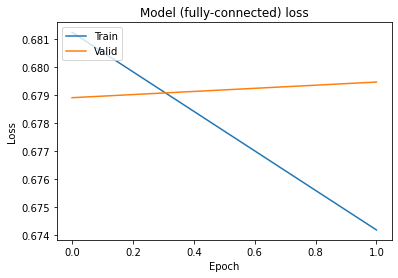

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(output_fc.history['loss'])
plt.plot(output_fc.history['val_loss'])
plt.title('Model (fully-connected) loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show();

In [13]:
from tensorflow.keras.layers import SpatialDropout1D

In [14]:
# now try with a simple LSTM layered Model
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SpatialDropout1D(0.3)) # spatial is differenet from normal dropout
model.add(LSTM(128, return_sequences=True))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         131584    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,823,297
Trainable params: 2,823,297
Non-trainable params: 0
____________________________________________

In [15]:
output_lstm = model.fit(x_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=5, 
                         validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 35s 44ms/step - loss: 0.4345 - accuracy: 0.7923 - val_loss: 0.3903 - val_accuracy: 0.8318
Epoch 2/5
782/782 [==============================] - 34s 43ms/step - loss: 0.2661 - accuracy: 0.8942 - val_loss: 0.3946 - val_accuracy: 0.8258
Epoch 3/5
782/782 [==============================] - 34s 43ms/step - loss: 0.1818 - accuracy: 0.9314 - val_loss: 0.4386 - val_accuracy: 0.8327
Epoch 4/5
782/782 [==============================] - 33s 43ms/step - loss: 0.1283 - accuracy: 0.9530 - val_loss: 0.4805 - val_accuracy: 0.8199
Epoch 5/5
782/782 [==============================] - 33s 42ms/step - loss: 0.0880 - accuracy: 0.9701 - val_loss: 0.6035 - val_accuracy: 0.8254


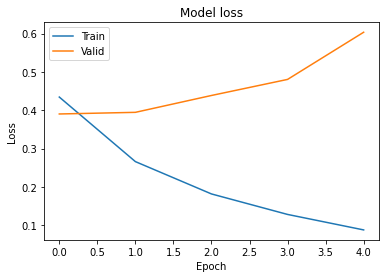

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(output_lstm.history['loss'])
plt.plot(output_lstm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show();

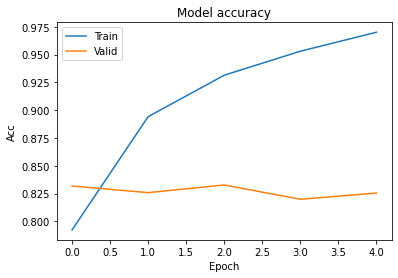

In [17]:
# graph accuracy
plt.plot(output_lstm.history['accuracy'])
plt.plot(output_lstm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show();

In [19]:
from tensorflow import keras 

# get embeddings from certain layer

layer_name = 'embedding_1'
test_seq = x_train[0]
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(test_seq)

In [20]:
intermediate_output[0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 1.43989930e-02, -7.07009435e-02, -4.76660989e-02, -4.89772409e-02,
        2.15356089e-02, -6.04589432e-02, -5.88695752e-03,  5.60684837e-02,
        6.16225228e-02, -5.52199855e-02, -4.11602147e-02, -1.96850486e-02,
       -2.38216259e-02, -7.86412433e-02, -9.41010658e-03,  2.07676692e-03,
       -3.62930596e-02,  3.25226896e-02,  5.25689870e-02, -2.60771774e-02,
       -4.51503880e-02,  5.26721030e-03,  4.95320447e-02,  6.67520314e-02,
        3.76817435e-02,  3.31651489e-03, -3.47410738e-02,  4.56265211e-02,
       -3.55649590e-02,  2.73887645e-02,  1.19395461e-02,  4.14095446e-02,
        6.35434836e-02, -5.60705476e-02,  2.88682058e-02, -2.88627632e-02,
       -9.09908209e-03, -3.65125537e-02,  7.70097319e-03, -2.76048575e-02,
       -1.22354897e-02,  4.13664393e-02, -6.61243796e-02,  6.19617896e-03,
        1.17848981e-02,  5.46965608e-03, -2.83032865e-03, -1.15314415e-02,
       -1.03152515e-02,  1.72164664e-02, -5.32357618

In [21]:
intermediate_output[3] # dense vectors

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 3.9984360e-02,  1.8496007e-03,  5.7945814e-02, -2.4160102e-02,
        6.4330769e-04, -4.8751654e-03, -2.7617112e-02,  1.1099360e-02,
        4.3292072e-02,  3.2176671e-03, -2.7525822e-02,  1.3003664e-02,
       -1.8698074e-02, -3.7033467e-03, -3.7210561e-02, -1.8350761e-02,
        2.0096753e-02, -2.5938647e-02, -9.1100410e-03,  7.8499690e-03,
       -2.3324318e-02, -3.2118883e-02, -3.4087371e-02, -1.4461271e-02,
       -4.8810830e-03,  3.2880608e-02, -2.2002596e-02,  3.9770234e-02,
       -3.6445525e-02, -3.0378822e-02, -2.7551551e-03, -2.8992830e-02,
        2.1620253e-02, -3.3207823e-02,  2.3246052e-02, -3.1573780e-02,
        3.5210729e-02, -5.4637078e-02, -3.0886611e-02,  1.6664822e-03,
        1.7692316e-02,  2.9022237e-02,  1.3639287e-02, -3.3825380e-03,
       -4.9009267e-02, -7.0211911e-03,  1.1966981e-02,  1.6665228e-02,
       -1.6624951e-03, -3.4375917e-02,  2.2907814e-02, -4.3681171e-02,
        2.6870880e-02, -5.344

In [22]:
print_text_from_seq(x_train[0])

Length = 80
that played the <UNK> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all


In [23]:
!pip install transformers 

     |████████████████████████████████| 778kB 4.4MB/s 
     |████████████████████████████████| 3.0MB 19.1MB/s 
     |████████████████████████████████| 1.1MB 51.0MB/s 
     |████████████████████████████████| 890kB 55.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=4b4a67a1800e20dd5615a9affa507883cd1872b8ae57989e24229206e4c088ec
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [24]:
from transformers import * # BERT is from HUGGINGFACE

model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-cased')

model_bert.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
model_bert.summary()

Some weights of the model checkpoint at bert-base-cased were not used when initializing TFBertForSequenceClassification: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier', 'dropout_40']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
_________________________________________________________________
dropout_40 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 108,311,810
Trainable params: 108,311,810
Non-trainable params: 0
_________________________________________________________________


In [25]:
output_bert = model_bert.fit(x_train, 
                         y_train, 
                         batch_size=batch_size, 
                         epochs=5, 
                         validation_data=(x_test, y_test))

Epoch 1/5
691/782 [=========================>....] - ETA: 46s - loss: 7.5487 - accuracy: 0.4989

KeyboardInterrupt: ignored

PLACE TO GET PRETRAINED MODELS THAT RUN VERY WELL
[HUGGINGFACE](https://huggingface.co/)


## Challenge

You will be expected to use an Keras LSTM for a classicification task on the *Sprint Challenge*. 

# LSTM Text generation with Keras (Learn)

## Overview

What else can we do with LSTMs? Since we're analyzing the *sequence*, we can do more than classify - we can *generate* text. I'ved pulled some news stories using [newspaper](https://github.com/codelucas/newspaper/).

This example is drawn from the Keras [documentation](https://keras.io/examples/lstm_text_generation/).

In [26]:
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import random
import sys
import os

In [27]:
# grabbing some files from the repo
! git clone https://github.com/LambdaSchool/DS-Unit-4-Sprint-3-Deep-Learning.git

Cloning into 'DS-Unit-4-Sprint-3-Deep-Learning'...
remote: Enumerating objects: 1112, done.
remote: Total 1112 (delta 0), reused 0 (delta 0), pack-reused 1112
Receiving objects: 100% (1112/1112), 100.15 MiB | 42.15 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [28]:
! mv DS-Unit-4-Sprint-3-Deep-Learning/module1-rnn-and-lstm/articles/ .

In [29]:
data_files = os.listdir('./articles')

In [30]:
# Read in Data

data = []

for file in data_files:
    if file[-3:] == 'txt':
        with open(f'./articles/{file}', 'r', encoding='utf-8') as f:
            data.append(f.read())

In [31]:
len(data) # number of news articles

136

In [32]:
data[-1] # last article

'”Between the Towers,” shown here, is the central image in Mordicai Gerstein’s 2003 children’s book “The Man Who Walked Between the Towers.” (Mordicai Gerstein/Courtesy of R. Michelson Galleries)\n\nMordicai Gerstein, a children’s author and illustrator whose imaginative, exuberant works included a celebrated picture book in which he set out to “resurrect” the fallen World Trade Center towers — if only on the page — by retelling the true story of a French tightrope walker who once crisscrossed the air between them, died Sept. 24 at his home in Westhampton, Mass. He was 83.\n\nThe cause was esophageal cancer, said his wife, Susan Yard Harris.\n\nMr. Gerstein did not begin illustrating children’s books until he was nearly 40, after working for more than a decade in film and TV animation. He found in picture books a vehicle of expression far more magical than any television screen, one with limitless possibilities for exploration and discovery.\n\n“For me, picture books are little theater

In [33]:
# Encode Data as Chars
# manual preprocessing

# Gather all text 
# Why? 1. See all possible characters 2. For training / splitting later
text = " ".join(data)

# Unique Characters
chars = list(set(text))

# Lookup Tables
char_int = {c:i for i, c in enumerate(chars)} 
int_char = {i:c for i, c in enumerate(chars)} 

In [34]:
len(chars) # number of unique characters

121

In [35]:
int_char # number to character lookup

{0: 'g',
 1: 'W',
 2: 'r',
 3: '“',
 4: ':',
 5: ']',
 6: '@',
 7: 'ﬂ',
 8: 'J',
 9: '×',
 10: 'c',
 11: 'n',
 12: 'S',
 13: 'F',
 14: 'ã',
 15: 'M',
 16: 'E',
 17: 't',
 18: '🤔',
 19: '-',
 20: '©',
 21: 'ó',
 22: '4',
 23: '2',
 24: 'ö',
 25: 'f',
 26: 'I',
 27: '|',
 28: '—',
 29: '\xad',
 30: '.',
 31: '👻',
 32: '6',
 33: '🗣',
 34: 'H',
 35: 's',
 36: '”',
 37: '#',
 38: '0',
 39: '•',
 40: 'V',
 41: '?',
 42: '‘',
 43: 'ê',
 44: 'U',
 45: 'C',
 46: '–',
 47: '8',
 48: ')',
 49: '●',
 50: 'T',
 51: 'ñ',
 52: 'l',
 53: '7',
 54: ' ',
 55: '"',
 56: 'b',
 57: 'p',
 58: 'z',
 59: '*',
 60: '⅔',
 61: '5',
 62: 'R',
 63: 'B',
 64: 'o',
 65: 'X',
 66: 'P',
 67: 'w',
 68: '/',
 69: '―',
 70: '½',
 71: '(',
 72: '_',
 73: '!',
 74: '⅓',
 75: 'v',
 76: 'G',
 77: 'e',
 78: '\n',
 79: ',',
 80: '3',
 81: 'Y',
 82: 'u',
 83: 'Q',
 84: 'é',
 85: '9',
 86: 'x',
 87: 'm',
 88: 'K',
 89: 'i',
 90: '$',
 91: 'á',
 92: '1',
 93: '&',
 94: 'd',
 95: 'Z',
 96: 'è',
 97: "'",
 98: '\u2069',
 99: '{',
 

In [36]:
# Create the sequence data
# set up input data and labels

maxlen = 40
step = 5

encoded = [char_int[c] for c in text]

sequences = [] # Each element is 40 chars long
next_char = [] # One element for each sequence

for i in range(0, len(encoded) - maxlen, step):
    
    sequences.append(encoded[i : i + maxlen]) # training data
    next_char.append(encoded[i + maxlen]) # labels
    
print('sequences: ', len(sequences))


sequences:  178374


In [ ]:
sequences[0] # mapped numbers = characters

In [ ]:
# for loop to see the reverse lookup (charcters from numbers)
# for i in sequences[0]:
#   print(int_char[i])

In [38]:
# label , character related to label
next_char[0], int_char[next_char[0]]

(2, 'r')

In [40]:
# Create x & y

x = np.zeros((len(sequences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sequences),len(chars)), dtype=np.bool)

for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        x[i,t,char] = 1
    y[i, next_char[i]] = 1
        

In [41]:
# shape = (sequences, number of characters, onehotencoded version of characters)
x.shape

(178374, 40, 121)

In [42]:
x[0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
chars

In [44]:
y.shape # labels

(178374, 121)

In [45]:
(maxlen, len(chars))

(40, 121)

In [50]:
# build the model: a single LSTM

model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax')) # softmax = multiclass classification problem
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [47]:
def sample(preds):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / 1
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [48]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    
    print()
    print('----- Generating text after Epoch: %d' % epoch)
    
    start_index = random.randint(0, len(text) - maxlen - 1)
    
    generated = ''
    
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)
    
    for i in range(400):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_int[char]] = 1
            
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds)
        next_char = int_char[next_index]
        
        sentence = sentence[1:] + next_char
        
        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [49]:
# fit the model

model.fit(x, y,
          batch_size=32,
          epochs=10,
          callbacks=[print_callback])

Epoch 1/10
5573/5575 [============================>.] - ETA: 0s - loss: 2.5774
----- Generating text after Epoch: 0
----- Generating with seed: "Saturday Night Live comedian Al Franken "
Saturday Night Live comedian Al Franken Bon alilamy o pofpl In pJonin, nh mrabinet anmt.

A“a ahap y5e: Rokiat ugenos thensimathin Il: Sreabes yres cichenges besbo the mac. tome w whob toa mervithsuchathe reele hand coma s Spvoned I guses, chours a ariim arrial. Whetinsidisine.

Dab jiwsting the in to kema, gom got crond gricicen. E/phen

“The ainthine trawce lliking the Wathes, Anna]d the Mavpededic, and f olmy ar a pavel seat se taed 
5575/5575 [==============================] - 39s 7ms/step - loss: 2.5774
Epoch 2/10
5575/5575 [==============================] - ETA: 0s - loss: 2.2294
----- Generating text after Epoch: 1
----- Generating with seed: "e were more of their parents’ historic l"
e were more of their parents’ historic leble (cluntins withmen in the ontresee houch (Mishiotr ax hir Patiphtrio

## Challenge

You will be expected to use a Keras LSTM to generate text on today's assignment. 

# Review

- <a href="#p1">Part 1: </a>Describe Neural Networks used for modeling sequences
    * Sequence Problems:
        - Time Series (like Stock Prices, Weather, etc.)
        - Text Classification
        - Text Generation
        - And many more! :D
    * LSTMs are generally preferred over RNNs for most problems
    * LSTMs are typically a single hidden layer of LSTM type; although, other architectures are possible.
    * Keras has LSTMs/RNN layer types implemented nicely
- <a href="#p2">Part 2: </a>Apply a LSTM to a text generation problem using Keras
    * Shape of input data is very important
    * Can take a while to train
    * You can use it to write movie scripts. :P 